In [20]:
#Installing libraries

import pandas as pd
!pip install datasets
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

#Loading data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: C:\Users\zyesn\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


In [21]:
# specifying job country as US and title as Data analyst role
df_da_us = df[(df['job_country'] == 'United States') & (df['job_title'] == 'Data Analyst')].copy()

In [22]:
#based on posted date deriving month number as a new column
df_da_us['job_posted_month_no'] = df_da_us['job_posted_date'].dt.month

In [23]:
#exploding df based on 'job_skills' column
df_da_us_explode = df_da_us.explode('job_skills')

In [24]:
#pivoting the datafrae
df_da_us_pivot = df_da_us_explode.pivot_table(columns='job_skills', index='job_posted_month_no', aggfunc='size', fill_value=0 )

In [25]:
#total row creation 
df_da_us_pivot.loc['Total'] = df_da_us_pivot.sum()

In [26]:
#sorting the pivoted table based on index in ascending order
df_da_us_pivot = df_da_us_pivot[df_da_us_pivot.loc['Total'].sort_values(ascending=False).index]

In [27]:
#dropping total column
df_da_us_pivot = df_da_us_pivot.drop('Total')

In [28]:
#grouping by month number to get total job posting count monthly
df_totals = df_da_us.groupby('job_posted_month_no').size()

In [29]:
#dividing by total number of job posting to get % of appearance of certain skill per month
df_da_us_percent = df_da_us_pivot.div(df_totals/100,axis=0)

In [ ]:
#converting from month number to month name column
df_da_us_percent = df_da_us_percent.reset_index()
df_da_us_percent['job_posted_month'] = df_da_us_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format = '%m').strftime('%b'))
df_da_us_percent = df_da_us_percent.set_index('job_posted_month')
df_da_us_percent = df_da_us_percent.drop(columns='job_posted_month_no')

In [42]:
df_plot = df_da_us_percent.iloc[:,0:5]

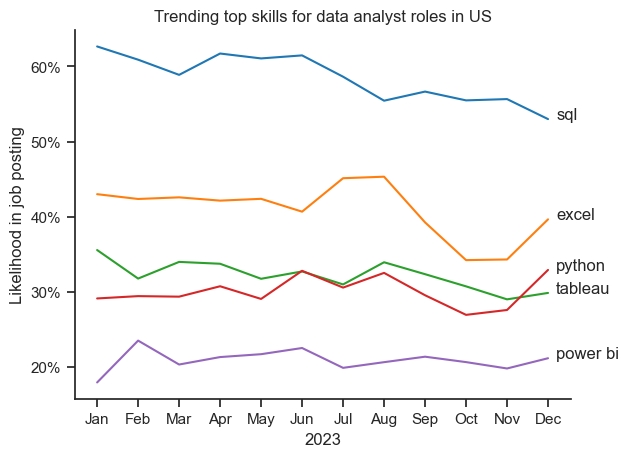

In [74]:
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.legend().remove()
plt.ylabel('Likelihood in job posting')
plt.xlabel('2023')
plt.title('Trending top skills for data analyst roles in US')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter(decimals=0))

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1,i], df_plot.columns[i])